In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df = pd.read_csv('/Users/brunosterzabaggio/Documents/Projects for Portfolio/Heart Attack - ML Project/heart.csv')

In [3]:
print('DATA DICTIONARY\n\n')
print('Age: age of the patient')
print('Sex: sex of the patient. (0 = female; 1 = male)')
print('exang: exercise induced angina (0 = no; 1 = yes)')
print('ca: number of major vessels (0 - 3)')
print('cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)')
print('trtbps: resting blood pressure')
print('chol: cholesterol in mg/dl')
print('fbs: fasting blood sugar > 120mg/dl (0 = false; 1 = false)')
print('rest_ecg: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2: showing left ventricular hypertrophy')
print('thalach: maximum heart rate achieved')
print('target variable: 0 = lesse chance of heart attack, 1 = more chance of heart attack')

DATA DICTIONARY


Age: age of the patient
Sex: sex of the patient. (0 = female; 1 = male)
exang: exercise induced angina (0 = no; 1 = yes)
ca: number of major vessels (0 - 3)
cp: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
trtbps: resting blood pressure
chol: cholesterol in mg/dl
fbs: fasting blood sugar > 120mg/dl (0 = false; 1 = false)
rest_ecg: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2: showing left ventricular hypertrophy
thalach: maximum heart rate achieved
target variable: 0 = lesse chance of heart attack, 1 = more chance of heart attack


In [4]:
#exploring the dataset 
print("The dimensionality of the heart.csv dataset is : ", df.shape)

The dimensionality of the heart.csv dataset is :  (303, 14)


In [5]:
#exploring the dataset 
print('The first 5 rows of the heart.csv dataset')
df.head()

The first 5 rows of the heart.csv dataset


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#exploring the dataset
print('The numbers of unique values in each columnn')
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

The numbers of unique values in each columnn


,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [7]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The columns with fixed values are : ", cat_cols)
print("The columns with dependent values : ", con_cols)
print("The target variable is :  ", target_col)

The columns with fixed values are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The columns with dependent values :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [8]:
#readable summary of statics in the data frame:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
#search for missing values
print('This is a indication that the data avaible from Kaggle is clean and complete.')
df.isnull().sum()

This is a indication that the data avaible from Kaggle is clean and complete.


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

A plot showing the count of observations for different categorical features.


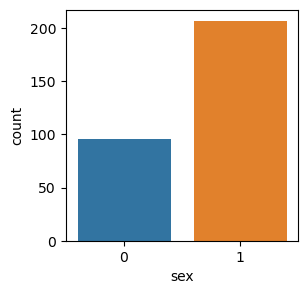

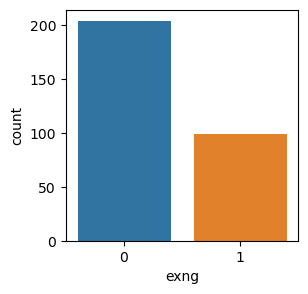

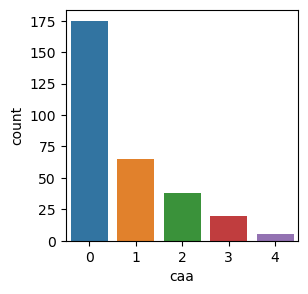

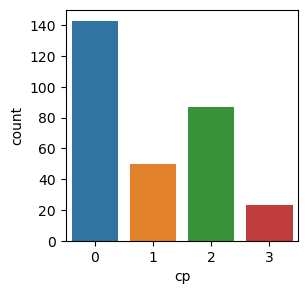

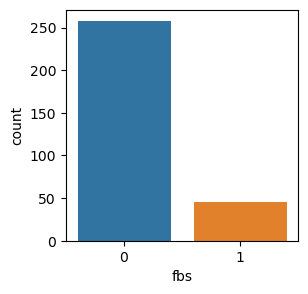

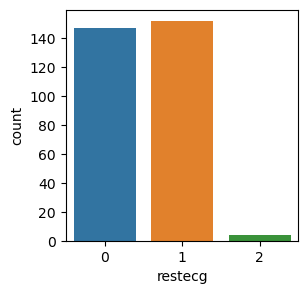

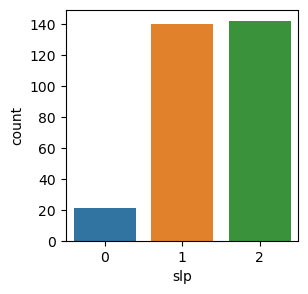

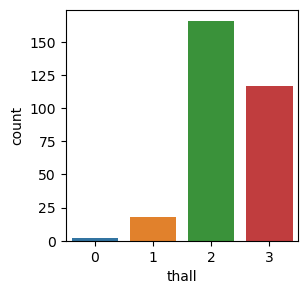

In [10]:
print("A plot showing the count of observations for different categorical features.")

for col in cat_cols:
    plt.figure(figsize=(3, 3))
    sns.countplot(x=col, data=df)
    plt.show()

A plot showing the distribution of numerical data for different continuous features.


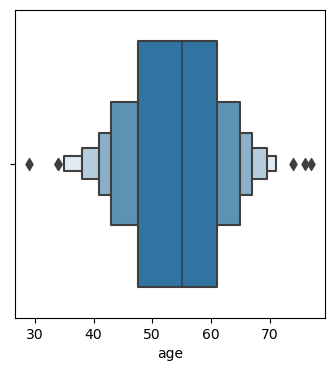

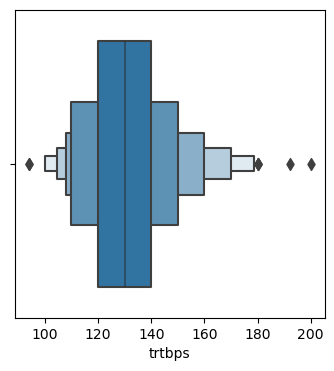

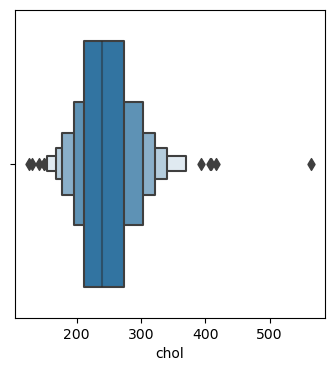

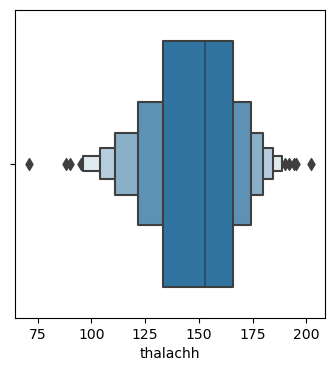

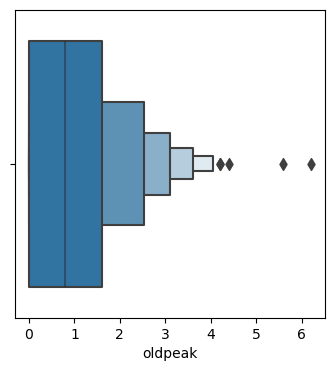

In [11]:
print("A plot showing the distribution of numerical data for different continuous features.")

for col in con_cols:
    plt.figure(figsize=(4, 4))
    sns.boxenplot(x=col, data=df)
    plt.show()

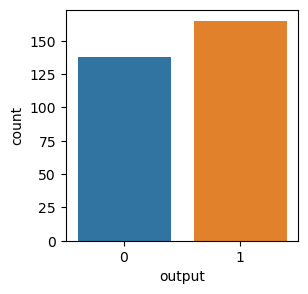

In [12]:
for col in target_col:
    plt.figure(figsize=(3, 3))
    sns.countplot(x=col, data=df)
    plt.show()

In [13]:
#Bivariate Analysis

In [14]:
print('Table shows the correlation coefficients between all pairs of continuous independent variables in the model')
df_corr = df[con_cols].corr().transpose()
df_corr

Table shows the correlation coefficients between all pairs of continuous independent variables in the model


,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


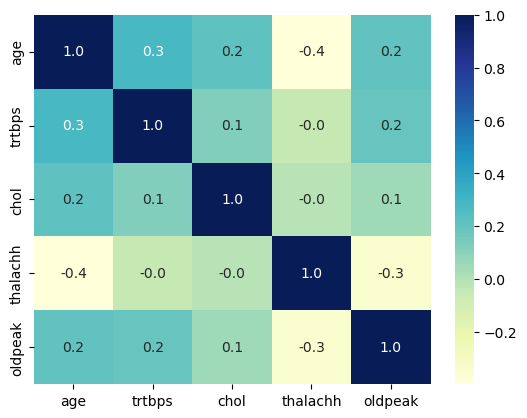

In [15]:
sns.heatmap(df_corr, annot=True, fmt=".1f", cmap='YlGnBu')
plt.show()

Scatterplot heatmap of the correlation matrix


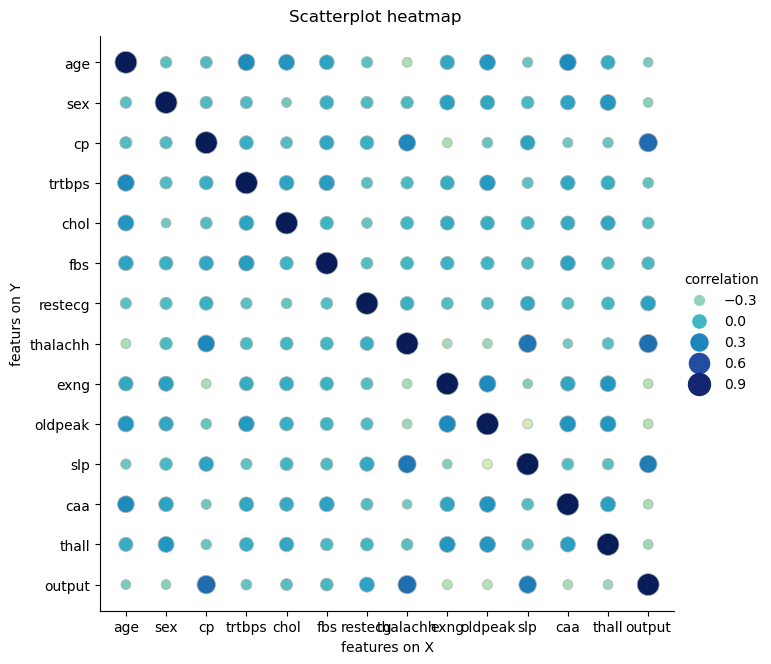

In [16]:
print('Scatterplot heatmap of the correlation matrix')
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=7, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap')
plt.show()


Distribution of age according to the target variable


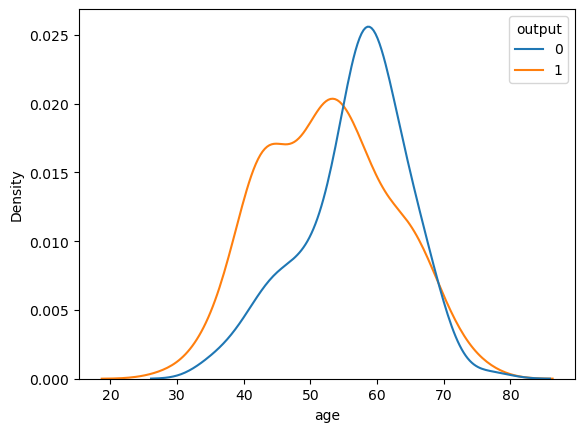

In [17]:
print('Distribution of age according to the target variable')
sns.kdeplot(data=df, x='age',hue="output");

Distribution of trtbps according to the target variable


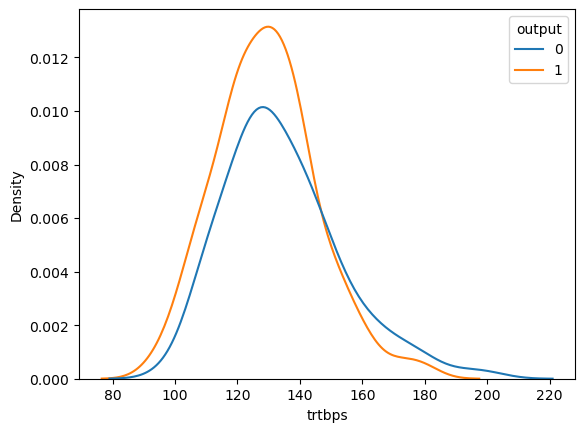

In [18]:
print('Distribution of trtbps according to the target variable')
sns.kdeplot(data=df, x='trtbps',hue="output");

Distribution of chol according to the target variable


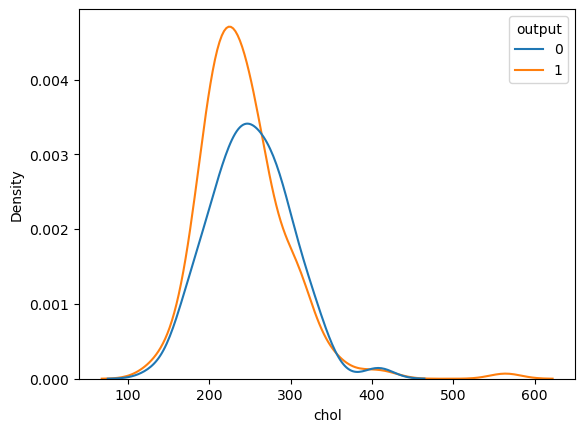

In [19]:
print('Distribution of chol according to the target variable')
sns.kdeplot(data=df, x='chol', hue='output');

Distribution of thalachh according to the target variable


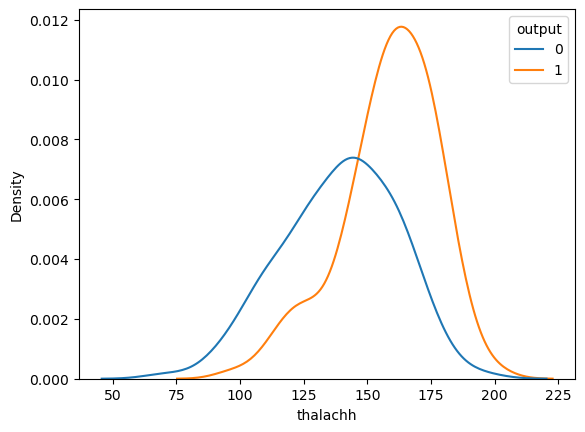

In [20]:
print('Distribution of thalachh according to the target variable')
sns.kdeplot(data=df, x='thalachh', hue='output');

Distribution of oldpeak according to the target variable


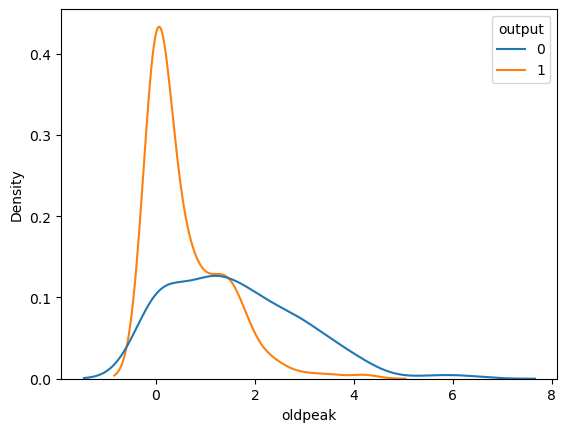

In [21]:
print('Distribution of oldpeak according to the target variable')
sns.kdeplot(data=df, x='oldpeak', hue='output');

Chest pain distribution

0 - Typical Angina
1 - Atypical Angina
2 - Non-anginal Pain
3 - Asymptomatic


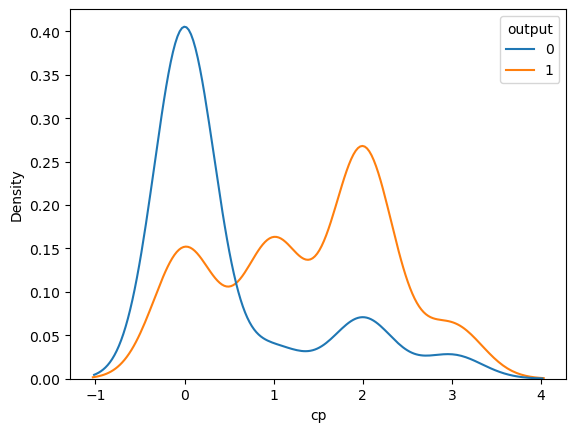

In [22]:
print('Chest pain distribution\n\n0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic')
sns.kdeplot(data=df, x='cp',hue="output");

Number of major vessels

0 vessels
1 vessel
2 vessels
3 vessels
4vessels


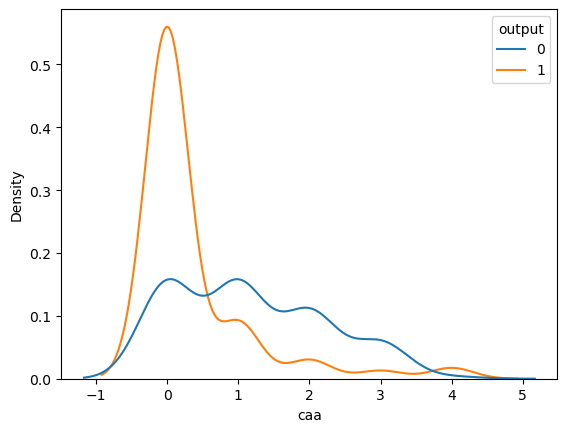

In [23]:
print('Number of major vessels\n\n0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels')
sns.kdeplot(data=df, x='caa',hue="output");

Heart attack according to sex

0 - Female
1 - Male


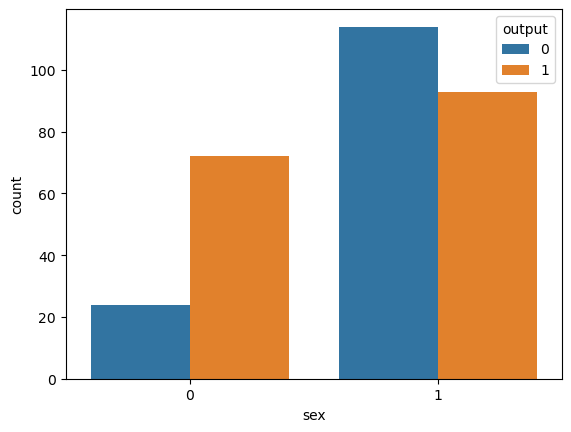

In [24]:
print('Heart attack according to sex\n\n0 - Female\n1 - Male')
sns.countplot(data=df,x='sex', hue='output');

Distribuition of thall according to target variable

Thalium Stress Test Result
0, 1, 2, 3, 4


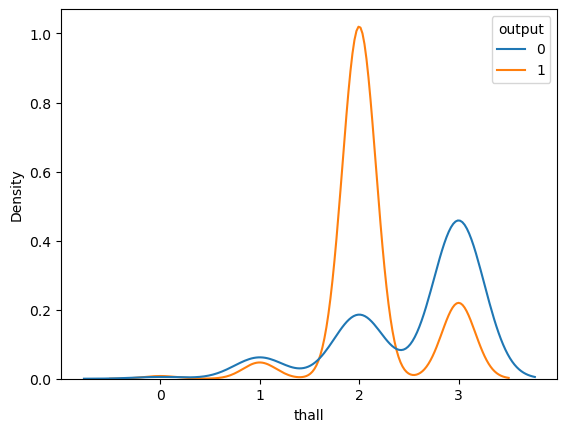

In [25]:
print('Distribuition of thall according to target variable\n\nThalium Stress Test Result\n0, 1, 2, 3, 4')
sns.kdeplot(x='thall', data=df, hue='output');

Boxen plot of thalachh wrt outcome

Maximum heart rate achieved


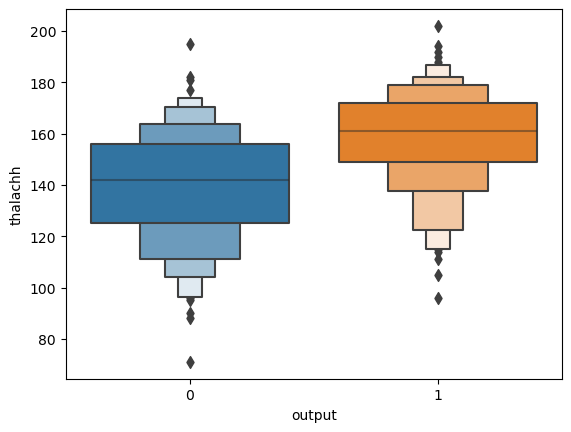

In [26]:
print('Boxen plot of thalachh wrt outcome\n\nMaximum heart rate achieved')
sns.boxenplot(x='output', y='thalachh', data=df);

Strip plot of exng vs age

Exercise induced
angina
0 - No
1 - Yes


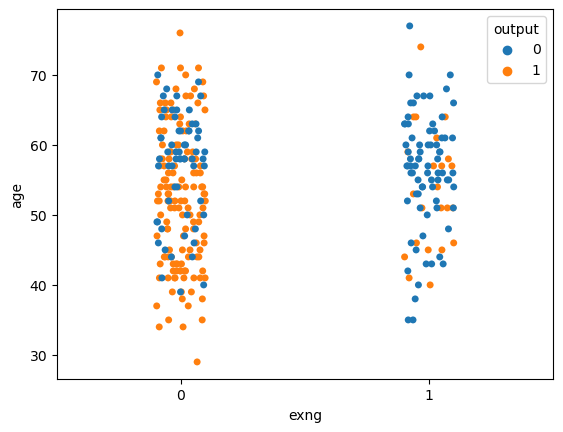

In [27]:
print('Strip plot of exng vs age\n\nExercise induced\nangina\n0 - No\n1 - Yes')
sns.stripplot(data=df,x='exng',y='age',hue='output');

Matrix of scatter plots and histograms of all the variables in a dataset according to target variable


<Figure size 2000x2000 with 0 Axes>

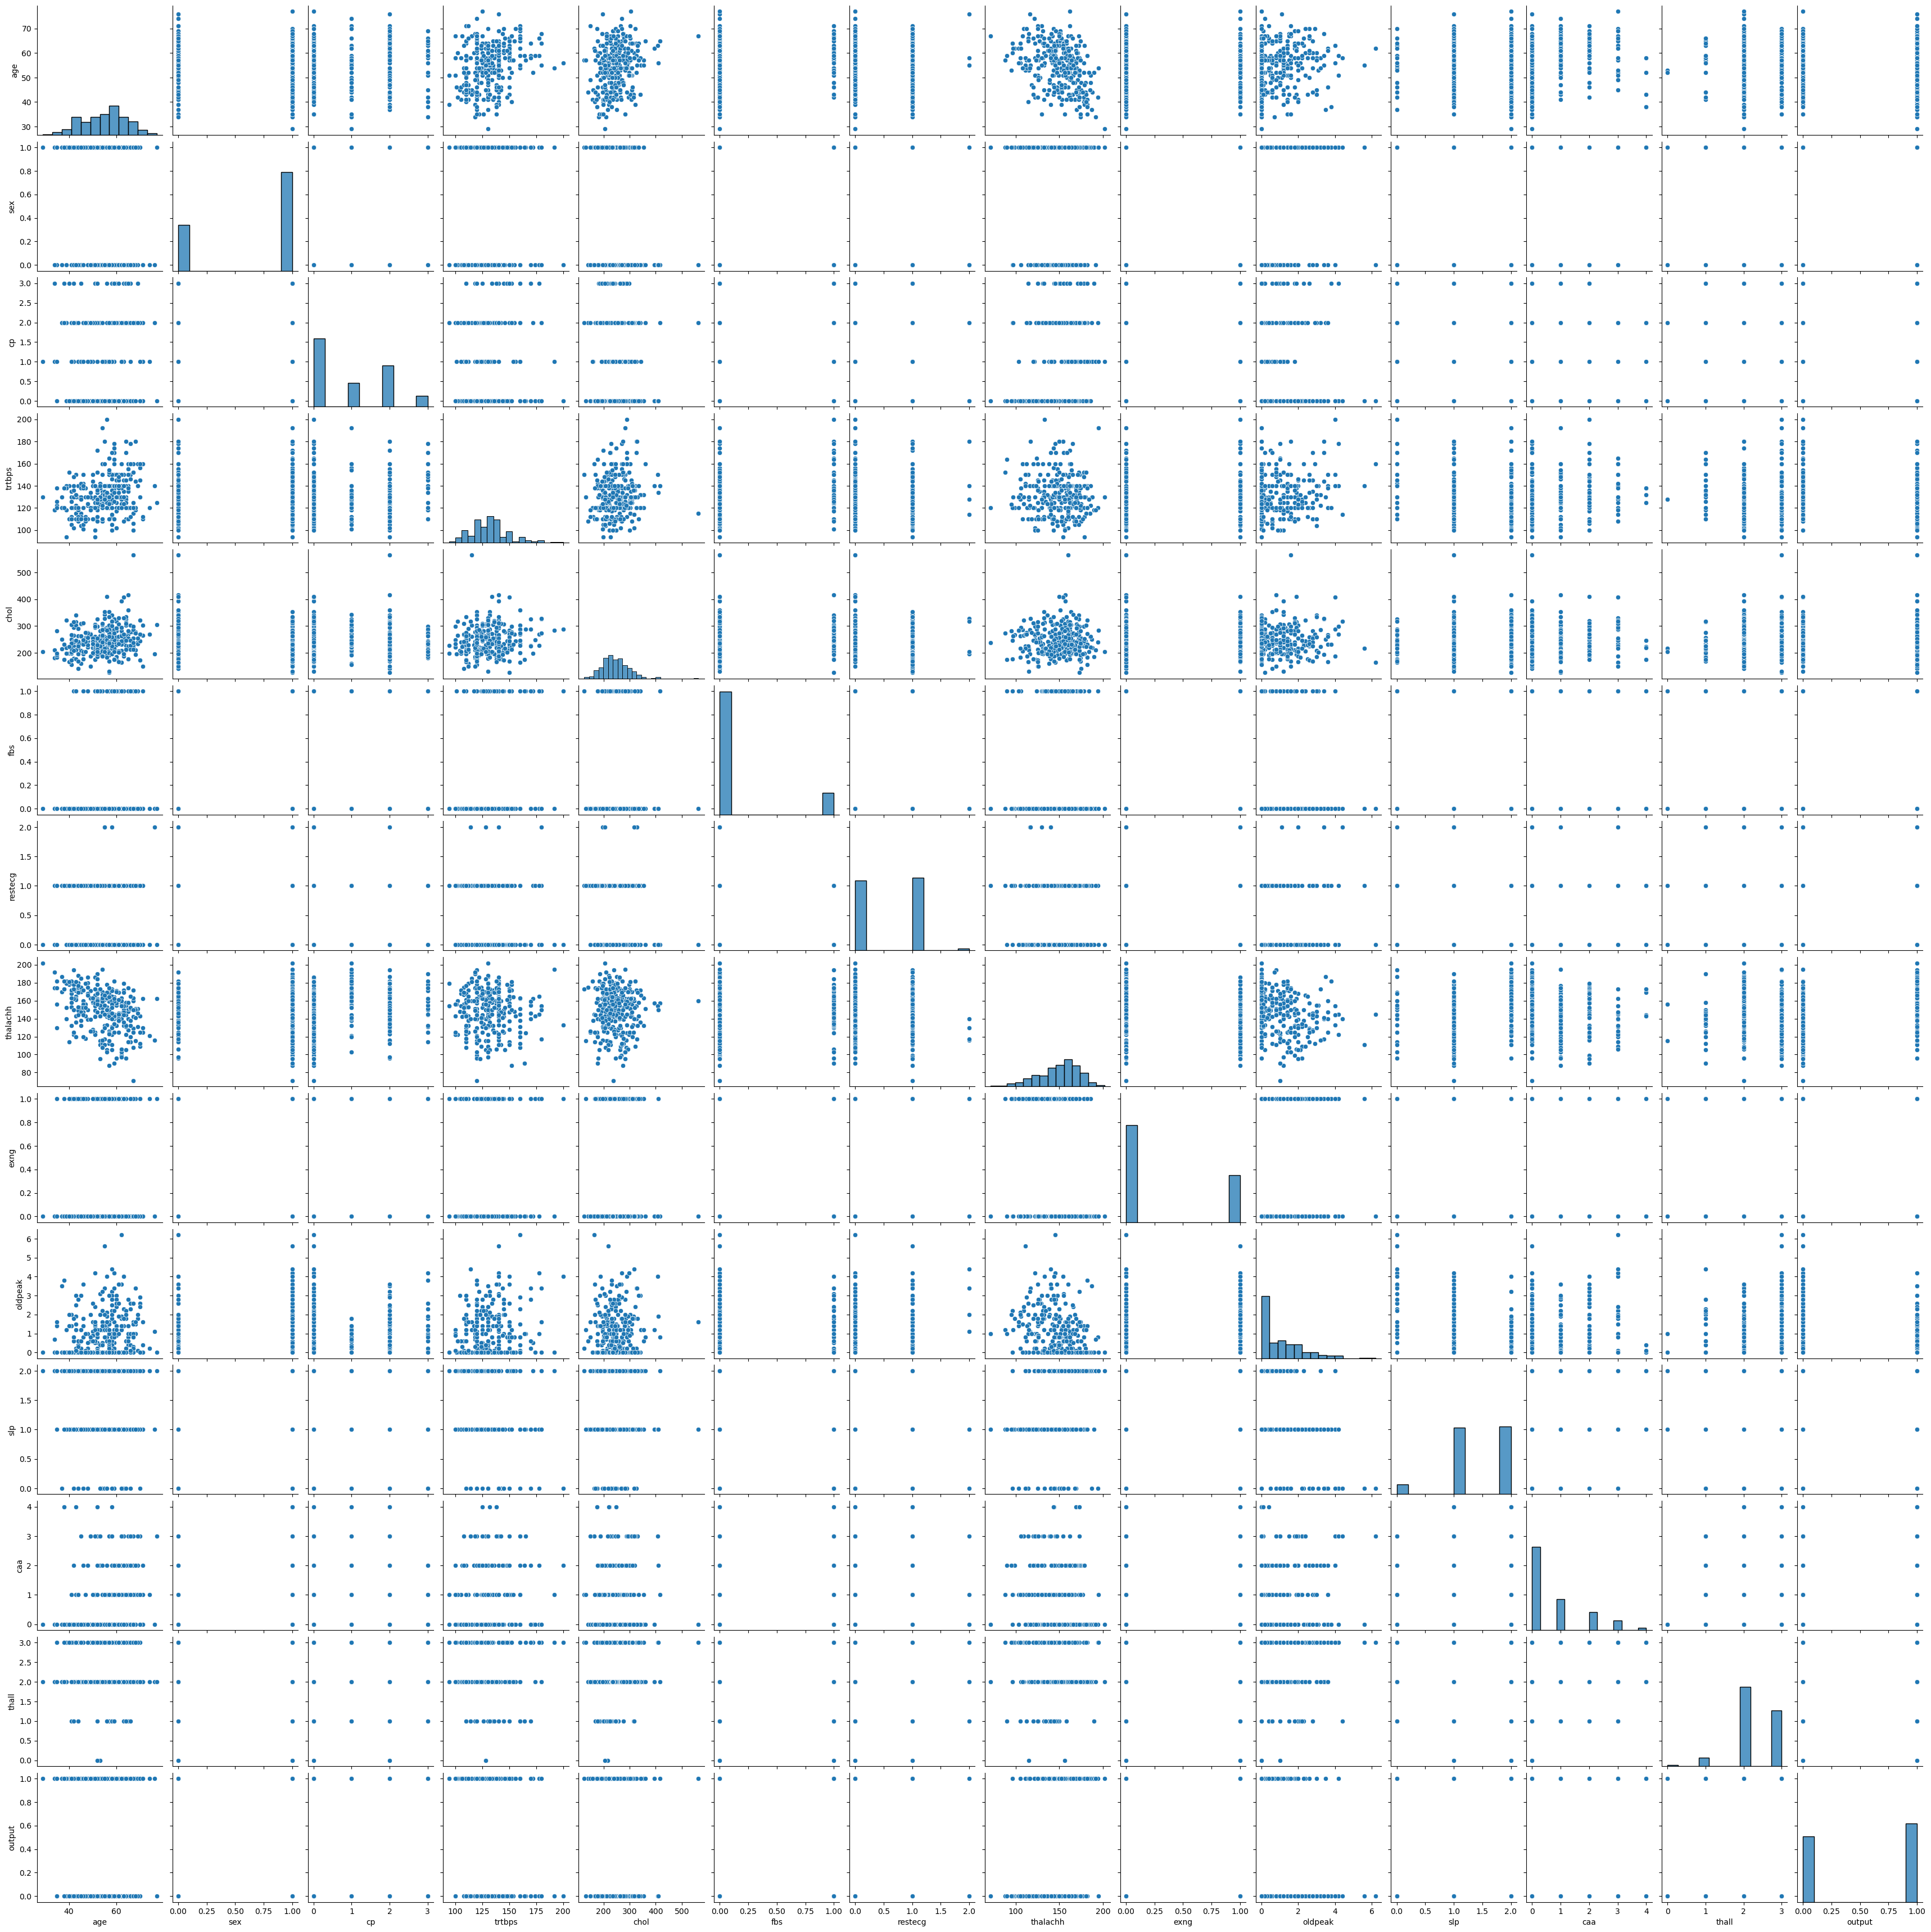

In [28]:
print('Matrix of scatter plots and histograms of all the variables in a dataset according to target variable')
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

In [29]:
print('Summary the key findings from the Exploratory Data Analysis:\n\n')
print('* Age, cholesterol levels, and maximum heart rate achieved during exercise were all positively correlated with the target variable.')
print('* Resting blood pressure was negatively correlated with the target variable.')

Summary the key findings from the Exploratory Data Analysis:


* Age, cholesterol levels, and maximum heart rate achieved during exercise were all positively correlated with the target variable.
* Resting blood pressure was negatively correlated with the target variable.


In [30]:
#split data into feature and target variables
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

X = df.drop(['output'],axis=1)
y = df[['output']]

In [31]:
#split and standardize train and test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size= 0.2, random_state= 0)
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [32]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_regression = LogisticRegression()
model_regression.fit(train_features, train_labels)
predicted_regression=model_regression.predict(test_features)


print('The model of Logistic Regression has an accurracy of', accuracy_score(test_labels, predicted_regression)*100, '%')

The model of Logistic Regression has an accurracy of 88.52459016393442 %


In [33]:
#Support Vector Classification

from sklearn.svm import SVC

model_svc = SVC(kernel='linear', C=1, random_state=42)
model_svc.fit(train_features, train_labels)
  
predicted_svc = model_svc.predict(test_features)
print("The accuracy of SVM is:", accuracy_score(test_labels, predicted_svc)*100, "%")

The accuracy of SVM is: 85.24590163934425 %


In [34]:
#Random Forest Model

from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model_rfr.fit(train_features, train_labels)  
predicted_rfr = model_rfr.predict(test_features)
print("The accuracy of Random Forest is:", accuracy_score(test_labels, predicted_rfr.round())*100, "%")

The accuracy of Random Forest is: 81.9672131147541 %


In [35]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_features, train_labels)
y_pred = dt.predict(test_features)

print("The test accuracy score of Decision Tree is", accuracy_score(test_labels, y_pred))

The test accuracy score of Decision Tree is 0.7540983606557377


In [36]:
#KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

model_knc = KNeighborsClassifier(n_neighbors = 1)  
model_knc.fit(train_features, train_labels)
predicted_knc = model_knc.predict(test_features)
  

print(confusion_matrix(test_labels, predicted_knc))
print("The accuracy of KNN is:", accuracy_score(test_labels, predicted_knc.round())*100, "%")

[[22  5]
 [ 9 25]]
The accuracy of KNN is: 77.04918032786885 %


In [37]:
print('Summary of Model Results\n')
print('Logistic Regression Model:', accuracy_score(test_labels, predicted_regression)*100, '%')
print('Support Vector Machine:', accuracy_score(test_labels, predicted_svc)*100, "%")
print('Random Forest Regressor:', accuracy_score(test_labels, predicted_rfr.round())*100, "%")
print('KNeighbors Classifier:', accuracy_score(test_labels, predicted_knc.round())*100, "%")
print('Decision Tree Classifier:', accuracy_score(test_labels, y_pred)*100, '%')

Summary of Model Results

Logistic Regression Model: 88.52459016393442 %
Support Vector Machine: 85.24590163934425 %
Random Forest Regressor: 81.9672131147541 %
KNeighbors Classifier: 77.04918032786885 %
Decision Tree Classifier: 75.40983606557377 %


In [38]:
#Average of perfomance
import statistics

perfomances = ((accuracy_score(test_labels, (predicted_regression))),
                (accuracy_score(test_labels, predicted_svc)),
                (accuracy_score(test_labels, predicted_rfr.round())),
               (accuracy_score(test_labels, predicted_knc.round())),
               (accuracy_score(test_labels, y_pred))
              )
average = statistics.mean(perfomances)
highest = max(perfomances)
diff = average - highest

print("The average of the accuracy of the models tested is:", average,'%')
print("The model with the highest accuracy, Logistic Regression Model, had a difference of", diff,
      'in comparission with the average of the others models.')

The average of the accuracy of the models tested is: 0.8163934426229508 %
The model with the highest accuracy, Logistic Regression Model, had a difference of -0.06885245901639347 in comparission with the average of the others models.


In [39]:
print('Conclusions:\n')
print('*The most accurate model was identified as the Logistic Regression Model, exhibiting an accuracy of 88%.')
print('*The present study employed a dataset containing a limited number of individuals and lacked information regarding prevalent diseases associated with heart attack.')
print('*The results presented here are not intended for clinical use but rather to show the implementation of machine learning algorithms.')
print("*Five distinct algorithms were tested, yielding satisfactory results overall. ")


Conclusions:

*The most accurate model was identified as the Logistic Regression Model, exhibiting an accuracy of 88%.
*The present study employed a dataset containing a limited number of individuals and lacked information regarding prevalent diseases associated with heart attack.
*The results presented here are not intended for clinical use but rather to show the implementation of machine learning algorithms.
*Five distinct algorithms were tested, yielding satisfactory results overall. 
